### Identifications of some lines from the DB



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy.convolution import Gaussian1DKernel, convolve

import sys , os
sys.path.append("../../src/lines")

import lineTools as lt


### working dir. and files
wd = "/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/"
os.chdir(wd)

datadir   = "dataSpecAll/"
dbline    = "lineAll.db"
transfile = "splatalogue.csv"
dirplot   = "plots/"

### Read the transition file

In [94]:
trans = pd.read_csv(transfile, sep=":")
nline = len(trans)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print("%s %d %s transition lines from splatalogue"%(color.BOLD, nline,  color.END))

 346  transition lines from splatalogue


### Find the lines

In [145]:
al = lt.analysisLines(dbline)
res = al.getInfoDB(verbose = False)


## Frequency range to check for the line frequency at rest applying the redshift (one source can have several z)
##
df = 0.1
ndetected = 0
snmin = 3.0
sourcewithnoredshift =[]

linesFound = []
sumtable = ""
print("## Searching for lines in %s.."%(transfile))
print("## Tolerance : %3.3f MHz"%(df*1000.))
print("## S/N min : %3.2f"%(snmin))
   

for i in range(nline):
    freqLine  = trans.loc[i,'Freq']
    nameTrans = trans.loc[i,'Species']
    transLow  = freqLine - df
    transHigh = freqLine + df 
    
    for s  in res:
        lines = al.findLinesSource(s[0])
        if len(lines) > 0 and not isinstance(s[1], int):
            if "0538" in s[0]:
                print(lines)
            for z in s[1]:
                if not np.isnan(z):
                    for l in lines:
                        frest = l[4] * (1. + z)
                        if frest > transLow and frest < transHigh and l[2] >= snmin:
                            resDict = {}
                            print("## Line found..")
                            print("### Transition : %s %s %s - %3.3f GHz"%(color.BOLD, nameTrans, color.END, freqLine))
                            print("### Source : %s %s %s "%(color.BOLD, s[0], color.END))
                            print("### Redshift : %f"%(z))
                            print("### Detection : %3.3f GHz (rest) - %3.3f GHz (sky)"%( frest, l[4])) 
                            print("### S/N = %s%3.2f%s - I = %s%3.3f%s mJy"%(color.BOLD, l[2], color.END, color.BOLD, 1000*l[3],color.END))
                            print("### lineid : %s%d%s -- dataid : %s%d%s"%(color.BOLD, l[0], color.END, color.BOLD, l[1], color.END))
                            print("###")
                            ndetected += 1
                            ## formatted
                            vel = c.value * 1e-3 *  (float(frest) - freqLine) / freqLine
                            sumtable +="| %s | %2.4f | %s | %3.3f | %3.3f | %3.2f | %2.1f |  %d   | %d |  | \n"%(s[0], z, nameTrans, freqLine, vel, 1000.*l[3], l[2] , l[1], l[0])
                            
                            resDict['species'] = nameTrans
                            resDict['source'] = s[0]
                            resDict['frequency'] = freqLine
                            resDict['freqsky'] = l[4]
                            resDict['redshift'] = float(z)
                            resDict['freqatrest'] = float(frest)
                            resDict['peak'] = l[3]
                            resDict['snr'] = l[2]
                            resDict['dataid'] = l[1]
                            resDict['lineid'] = l[0]
                            ## query the datafile
                            cmdsql = "select filedata FROM dataset WHERE dataid = '%d'"%(l[1])
                            resdb = al.query(cmdsql)
                            resDict['filedata'] = resdb[0][0]
                            linesFound.append(resDict)

print("## %s %d %s tentative detections. "%(color.BOLD, ndetected, color.END) )                           
print("## Done..")
print(sumtable)

## Sources: 133
##
## Searching for lines in splatalogue.csv..
## Tolerance : 100.000 MHz
## S/N min : 3.00
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  13COv=0  - 110.201 GHz
### Source :  J0241-0815  
### Redshift : 0.005037
### Detection : 110.215 GHz (rest) - 109.662 GHz (sky)
### S/N = 3.37 - I = -10.870 mJy
### lineid : 7187 -- dataid : 4713
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.6

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  HDO  - 143.727 GHz
### Source :  J1924-292  
### Redshift : 0.352627
### Detection : 143.717 GHz (rest) - 106.250 GHz (sky)
### S/N = 3.15 - I = 2.330 mJy
### lineid : 8451 -- dataid : 5966
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  SiOv=0  - 173.688 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 173.713 GHz (rest) - 90.660 GHz (sky)
### S/N = 3.85 - I = 18.602 mJy
### lineid : 6095 -- dataid : 3584
###
## Line found..
### Transition :  SiOv=0  - 173.688 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 173.694 GHz (rest) - 90.650 GHz (sky)
### S/N = 3.53 - I = 24.396 mJy
### lineid : 6113 -- dataid : 3604
###
## Line found..
### Transition :  SiOv=0  - 173.688 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 173.646 GHz (rest) - 90.625 GHz (sky)
### S/N = 3.60 - I = -26.010 mJy
### lineid : 6114 -- dataid : 3604
###
## Line found..
### Transition :  SiOv=0  - 173.688 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 173.747 GHz (rest) - 90.678 GHz (sky)
### S/N = 3.53 - I = -23.711 mJy
### lineid : 6170 -- dataid : 3744
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.60

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  HDO  - 213.507 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 213.499 GHz (rest) - 111.425 GHz (sky)
### S/N = 3.50 - I = 3.562 mJy
### lineid : 6880 -- dataid : 4381
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  DCNv=0  - 289.645 GHz
### Source :  J0501-0159  
### Redshift : 1.527100
### Detection : 289.611 GHz (rest) - 114.602 GHz (sky)
### S/N = 3.08 - I = -16.433 mJy
### lineid : 8995 -- dataid : 6858
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.69

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  SiOv=0  - 347.331 GHz
### Source :  J1833-2103  
### Redshift : 0.192600
### Detection : 347.258 GHz (rest) - 291.177 GHz (sky)
### S/N = 3.25 - I = 29.036 mJy
### lineid : 7798 -- dataid : 5746
###
## Line found..
### Transition :  SiOv=0  - 347.331 GHz
### Source :  J1833-2103  
### Redshift : 0.192600
### Detection : 347.420 GHz (rest) - 291.314 GHz (sky)
### S/N = 3.84 - I = 32.043 mJy
### lineid : 7799 -- dataid : 5746
###
## Line found..
### Transition :  NH3v=0  - 353.972 GHz
### Source :  J0501-0159  
### Redshift : 2.089000
### Detection : 354.006 GHz (rest) - 114.602 GHz (sky)
### S/N = 3.08 - I = -16.433 mJy
### lineid : 8995 -- dataid : 6858
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, 

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  C18O  - 439.089 GHz
### Source :  J2148+0657  
### Redshift : 0.898300
### Detection : 439.057 GHz (rest) - 231.289 GHz (sky)
### S/N = 4.17 - I = 9.491 mJy
### lineid : 4869 -- dataid : 2041
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  CI(C-atom)  - 492.161 GHz
### Source :  J0132-169  
### Redshift : 1.020000
### Detection : 492.093 GHz (rest) - 243.611 GHz (sky)
### S/N = 3.59 - I = 55.889 mJy
### lineid : 4760 -- dataid : 2002
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.

## Line found..
### Transition :  H2Ov=0  - 614.310 GHz
### Source :  J0403-360  
### Redshift : 1.422838
### Detection : 614.282 GHz (rest) - 253.538 GHz (sky)
### S/N = 3.08 - I = -44.038 mJy
### lineid : 5408 -- dataid : 2380
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

## Line found..
### Transition :  CSv=0  - 636.532 GHz
### Source :  J0423-013  
### Redshift : 0.916087
### Detection : 636.479 GHz (rest) - 332.177 GHz (sky)
### S/N = 3.14 - I = -21.676 mJy
### lineid : 7532 -- dataid : 5241
###
[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.6977

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

[(4035, 1697, 3.870902, -0.034986, 344.520048, 6.6e-05), (4037, 1699, 3.602076, -0.041953, 330.614078, 9.7e-05), (4051, 1704, 3.53328, 0.048702, 345.761577, 0.0001), (4053, 1705, 3.402177, 0.043015, 344.399775, 9.3e-05), (4056, 1706, 4.246502, -0.062587, 332.573965, 7.3e-05), (4058, 1706, 4.827574, -0.061306, 332.520432, 8.6e-05), (4059, 1706, 3.706294, 0.046098, 332.443711, 0.000105), (4060, 1707, 3.677275, 0.056353, 330.656667, 0.000101), (4061, 1707, 3.629838, 0.056246, 330.518961, 0.000132), (4062, 1707, 4.638797, -0.076744, 330.475388, 8.8e-05), (8736, 6137, 3.435586, -0.011872, 218.137309, 0.000874), (8738, 6138, 3.381998, -0.01103, 219.619554, 0.000888), (8739, 6138, 3.537154, -0.012003, 219.227946, 0.000739), (8740, 6138, 3.041841, 0.008788, 218.697799, 0.00165), (8741, 6139, 3.410487, 0.012638, 231.574083, 0.000676), (8742, 6139, 3.282572, -0.011417, 231.786101, 0.001034), (8744, 6140, 3.208487, 0.012721, 233.983935, 0.001412), (8745, 6140, 3.137821, -0.013511, 234.733136, 0.0

### Plots of the detected lines

The spectra is normalized to amp = 1. and unredshifted by 1.*(1.+z) <br>

In [139]:
def showText(posx , pys, text, ywidth = 1.):
    posy = pys
    dy = ywidth / len(text)
    for t in text:
        plt.text(posx,posy,t)
        posy += dy
    

def plotSpectra(det , dv , amp , vwidth = 250. , lineplot = True):
    "Plot the spectra with line detection and transition name"
    
    plt.figure(figsize=(8.0,4.5))
    plt.plot(dv,amp)
    x1 = max(min(dv),-1. * vwidth)
    x2 = min(max(dv),vwidth)
    ind = np.where(np.abs(dv) < 200 )
    ymin = min(amp[ind])
    ymax = max(amp[ind])
    y1 = ymin - (ymax-ymin)*0.25
    y2 = ymax + (ymax-ymin)*0.1
    dx = x2-x1
    dy = y2-y1
    
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    
    txt = []
    txt.append("Source : %s"%(det['source']))
    txt.append("Redshift : %s"%(det['redshift']))
    txt.append("Species : %s"%(det['species']))
    txt.append("Freq. Sky : %3.3f GHz"%(det['freqsky']))
    vel = c.value * 1e-3 *  (det['freqatrest']- det['frequency']) / det['frequency']
    txt.append("dv : %3.3f km/s"%(vel))
    txt.append("Lineid : %d"%(det['lineid']))
    txt.append("Dataid : %d"%(det['dataid']))
    showText(x1+dx*0.01, y1+dy*0.01 , txt, (y2-y1)*0.4)
    
    # xline= [det['frequency'], det['frequency']]
    xline = [0., 0.]
    xdetect = [vel, vel]
    yline = [0., 2.]

    if x1 <0 and x2>0 and lineplot:
        plt.plot(xdetect, yline, "g--")
        plt.plot(xline, yline, "r--")
        plt.text((x1-x2)*0.02, y1 + (y2-y1) * 0.3, det['species'] , rotation = 90. )
    
    figname = "%s%s-%s-%s.png"%(dirplot,det['source'],det['species'],det['lineid'])
    plt.savefig(figname)
    plt.show()
    
    
def plotSpectraPublication(vel, amp , info):
    "Plot published-like plot of the spectra with txt array info"
    
    plt.figure(figsize=(8.0,4.5))
    plt.step(dv,amp,  "b-" , linewidth = 1.0)
    plt.xlabel ("v (km/s)")
    plt.ylabel(r"$S^*$")
    
    
    vwidth = 200.
    x1 = info['velline'] - vwidth/ 2.0
    x2 = info['velline'] + vwidth/ 2.0
    ind = np.where(np.abs(dv) < 200 )
    ymin = min(amp[ind])
    ymax = max(amp[ind])
    y1 = ymin - (ymax-ymin)*0.3
    y2 = ymax + (ymax-ymin)*0.1
    dx = x2-x1
    dy = y2-y1
        
    xdetect = info['velline']
    xline = [xdetect,xdetect] 
    yline = [y1,y1 + dy * 0.15]
    plt.plot(xline,yline,"g--")
    
    xtxt = (x2+x1)/2. + dx*0.3
    ytxt = y1 + dy * 0.05
    plt.text(xtxt,ytxt,"%s"%(info['source']))
    plt.text(xdetect-dx*0.03 , y1 + dy*0.15,info["species"], rotation = 90)
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    
    figname = "%s%s-%s-%s.pdf"%(dirplot,info['source'],info['species'],info['lineid'])
    print(figname)
    #plt.savefig(figname)
                
    plt.show()

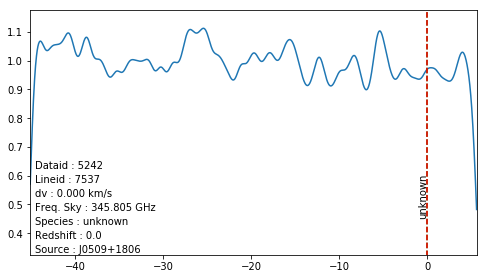

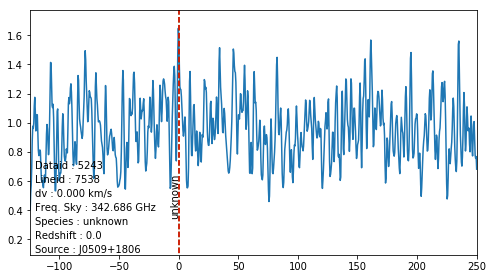

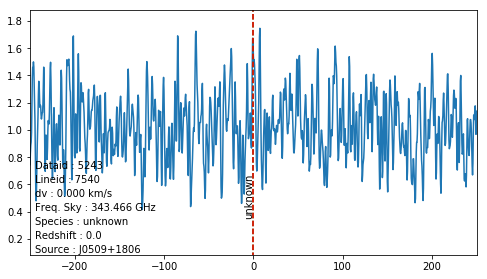

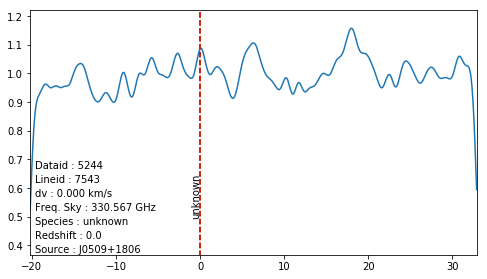

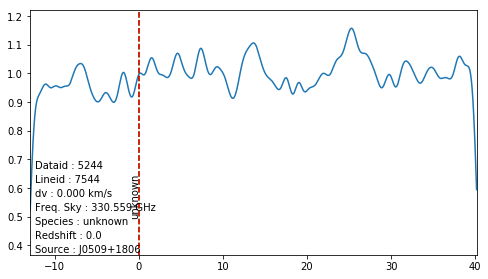

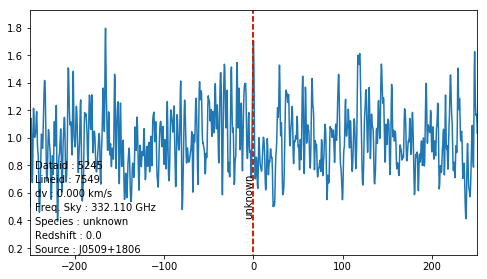

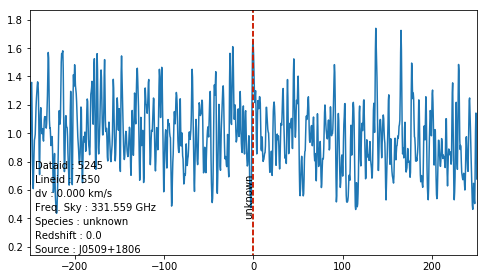

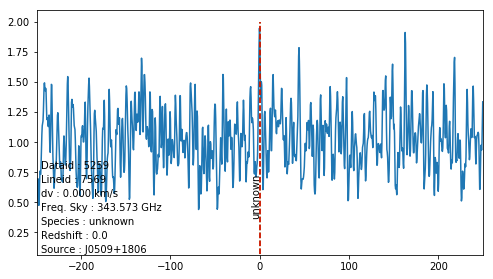

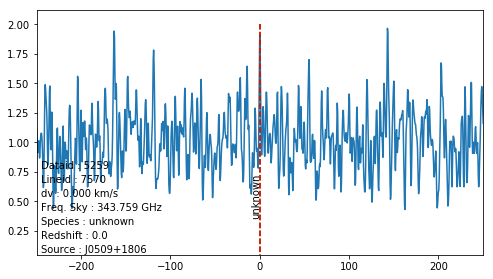

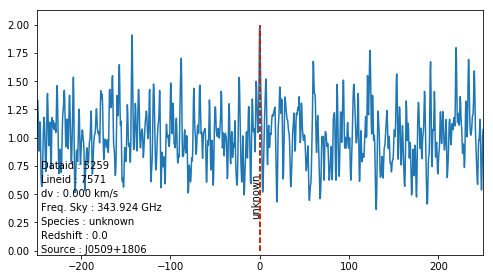

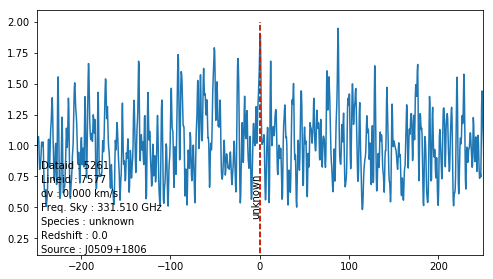

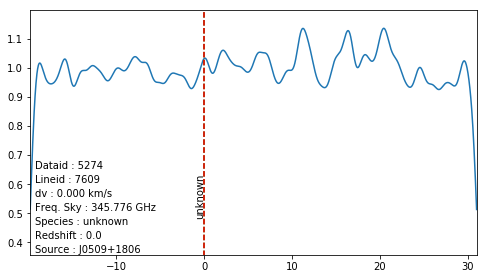

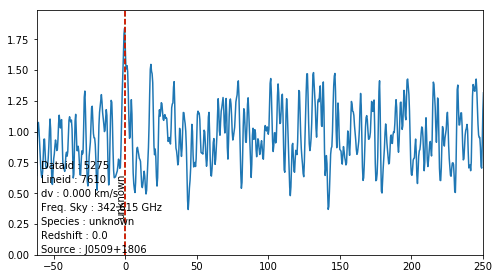

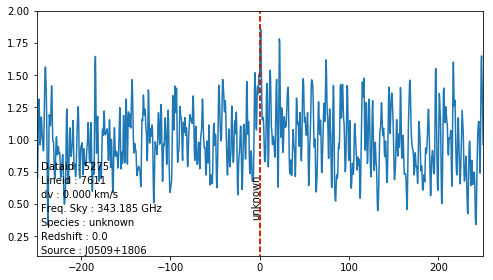

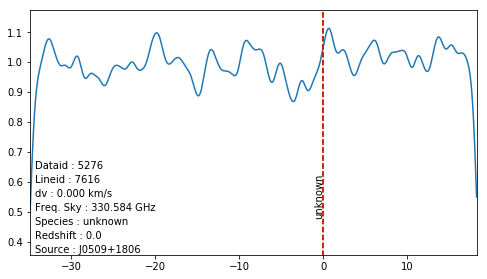

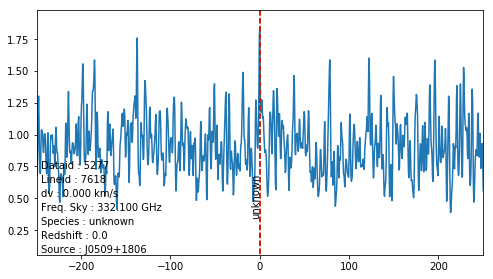

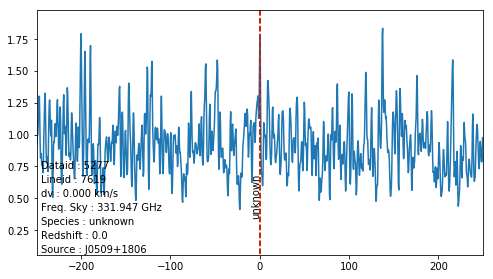

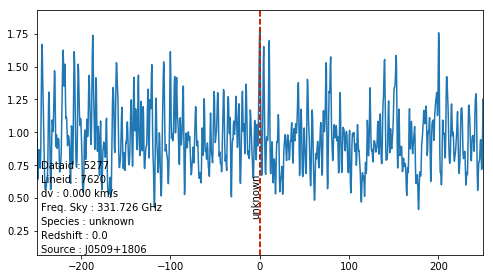

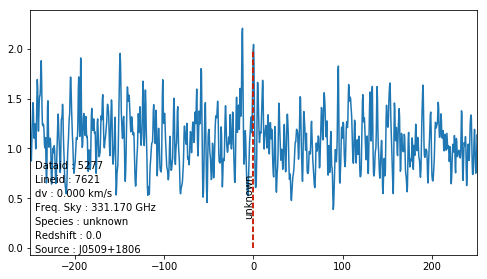

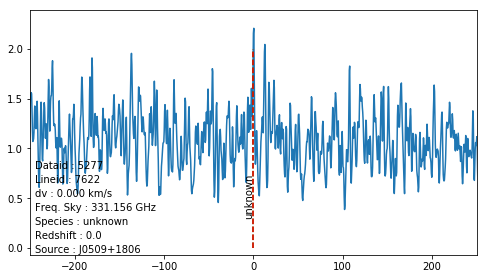

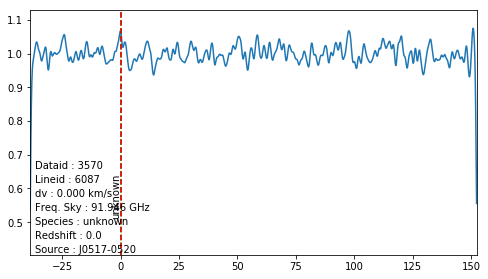

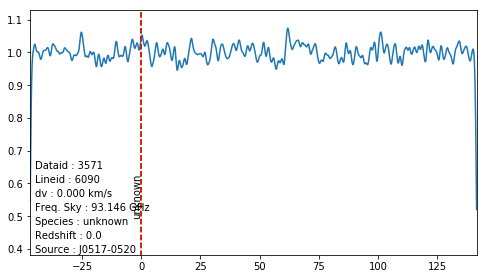

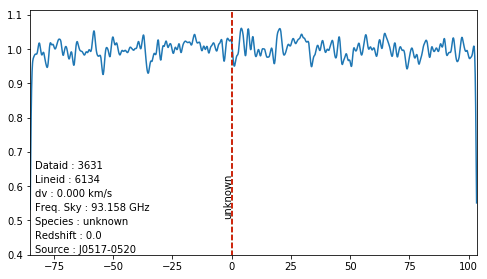

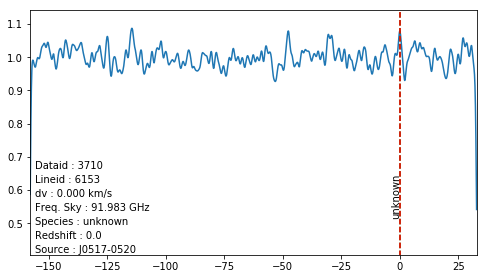

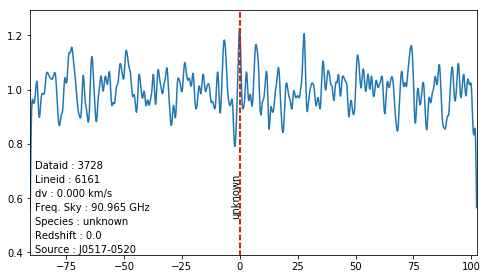

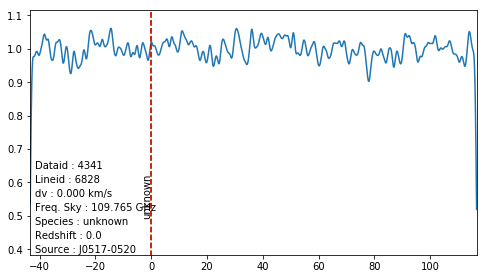

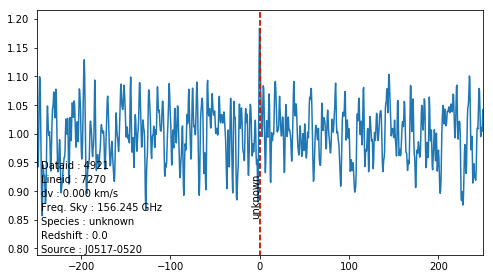

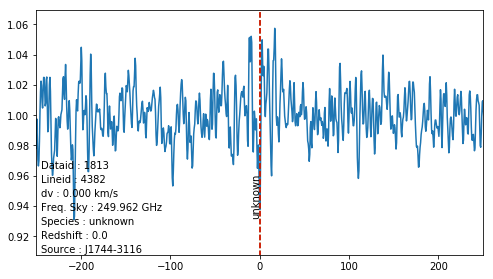

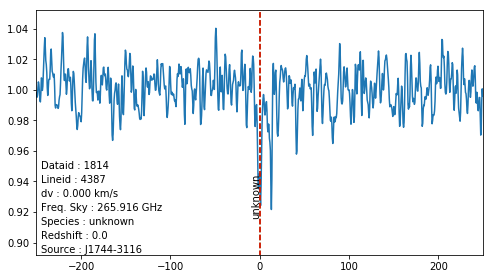

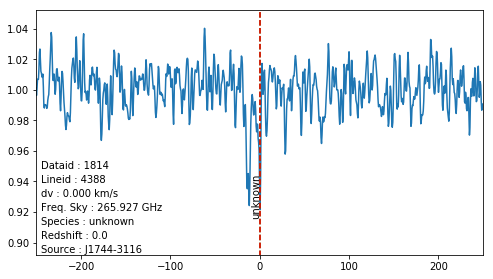

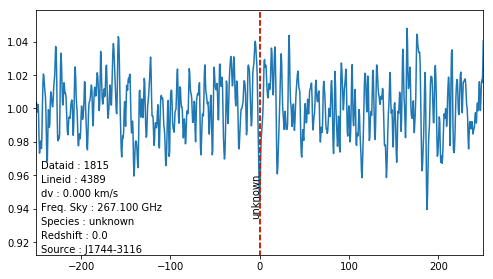

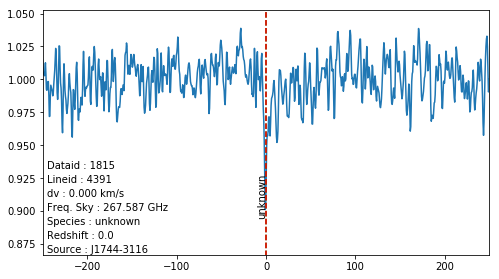

In [140]:
pl = lt.plotLines("fake", "fake", "fake")

for det in linesFound:
    datafile = datadir + det['filedata'][2:]
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    freq = freq * (1. + det['redshift'])
    dv = c.value * 1e-3 *  (freq - det['frequency']) / det['frequency']
    
    ## smoothing to 1 km/s
    # Create kernel
    ddv = abs(dv[1]-dv[0])
    kdv = 0.5 / ddv  ## 1km/s
    g = Gaussian1DKernel(stddev=kdv)
    z = convolve(amp, g)
    
    plotSpectra(det,dv,z)


### Results

 The detection are for following after checking each one.

| Source | redshift | Species | Frequency | Vel. | Peak | S/N | dataid | lineid  | Comments |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | 
| --- | --- | --- | GHz |  km/s | mJy | --- | --- | --- | 	--- |
| **J0219+0120** | 1.6230 | HDO | 255.050 | 59.075 | 32.59 | 4.8 |  4567   | 7042 | emission line, TBC |  
| **J0418+380** | 0.0485 | HNCv=0 | 362.630 | -29.982 | -967.54 | 7.4 |  1676   | 3989 |  TBC| 
| **J0538-440** | 0.8940 | HCNv=0 | 443.116 | 33.434 | 12.72 | 3.2 |  6140   | 8744 | abs. line! but telluric??| 
| **J051002+180041** | 0.4160 | H2Ov=0 | 474.689 | 35.129 | -26.21 | 6.6 |  167   | 167 |  |
| **J1159-2142** | 0.6170 | HDO | 157.404 | 7.946 | 22.36 | 3.9 |  6085 | 8645 | ?? | 
| J1159-2142 | 0.6170 | HDO | 157.404 | -36.446 | -24.55 | 4.1 |  6085 | 8646| ?? | 
| **J1337-1257** | 0.5390 | HDO | 364.907 | 32.025 | 18.54 | 5.6 |  6163   | 8805 | 1 line in 3 parts | 
| J1337-1257 | 0.5390 | HDO | 364.907 | 49.853 | -67.40 | 23.2 |  6163   | 8806 | 1 line in 3 parts  | 
| J1337-1257 | 0.5390 | HDO | 364.907 | 68.831 | 13.73 | 5.0 |  6163   | 8807 |  1 line in 3 parts  | 
| **J1832-2039** | 0.1033 | HDO | 263.832 | -43.877 | -175.91 | 3.4 |  5904   | 8242 | ??  | 
| J1832-2039 | 0.1033 | HDO | 263.832 | -46.916 | -187.31 | 5.3 |  5920   | 8283 | good | 
| J1832-2039 | 0.1033 | HDO | 263.832 | -60.033 | 97.83 | 3.2 |  5920   | 8284 | emission similar to previous 
| **J1833-2103** | 0.1926 | C17O | 337.061 | 29.409 | -23.42 | 3.3 |  5712   | 7682 | TBC | 
| J1833-2103 | 0.1926 | C17O | 337.061 | 29.276 | -22.96 | 3.9 |  5728   | 7743 | similar to previous only vel. | 
| **J1833-2103** | 0.8858 | SiOv=0 | 607.599 | -8.859 | -85.52 | 4.6 |  5777   | 7922 |  | 
| J1833-2103 | 0.8858 | SiOv=0 | 607.599 | -9.594 | -96.12 | 7.0 |  5793   | 7995 | same line as above | 
| **J1924-292** | 0.3526 | HDO | 143.727 | -21.000 | 2.33 | 3.1 |  5966 | 8451 | emission line | 
| **J2148+0657** | 0.7000 | NH3v=0 | 172.832 | 170.928 | 8.29 | 4.9 |  4204 | 6680 | TBC | 
| J2148+0657 | 0.8490 | SiOv=0 | 173.688 | 61.019 | -10.53 | 4.3 |  4762 | 7206| TBC , same line as HCO+ | 
| J2148+0657 | 0.8479 | SiOv=0 | 173.688 | -117.369 | -10.53 | 4.3 |  4762 | 7206| TBC , different z| 
| J2148+0657 | 0.8983 | HCO+v=0 | 178.375 | -32.588 | -10.53 | 4.3 |  4762 | 7206| TBC , good candidate, z! | 
| J2148+0657 | 0.9765 | HDO | 185.709 | -9.668 | -10.53 | 4.3 |  4762 | 7206 | TBC , good candidate , z!| 
| J2148+0657 | 0.8648 | NH3v=0 | 189.725 | -47.892 | 8.29 | 4.9 |  4204   | 6680 |  looks an abs.| 
| J2148+0657 | 0.8983 | C18O | 439.089 | -21.928 | 9.49 | 4.2 |  2041   | 4869 | same detectino withe 2 species | 
| J2148+0657 | 0.8983 | H2Ov=0 | 439.151 | -64.270 | 9.49 | 4.2 |  2041   | 4869 |  | 
  


### Printable Form

plots/J0219+0120 - HDO -7042.pdf


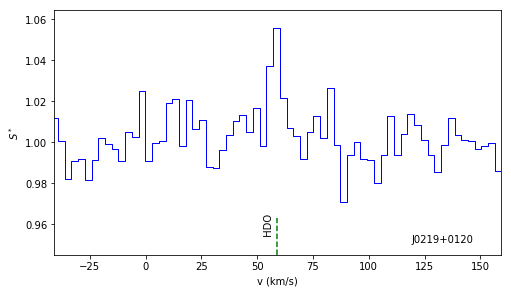

plots/J0418+380 - HNCv=0 -3989.pdf


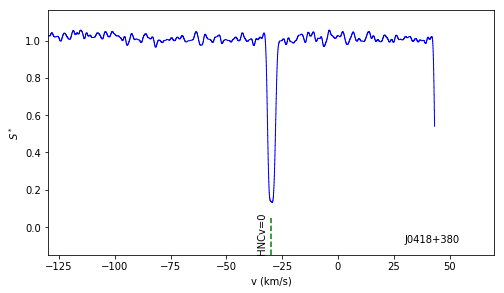

plots/J0538-440 - HCNv=0 -8744.pdf


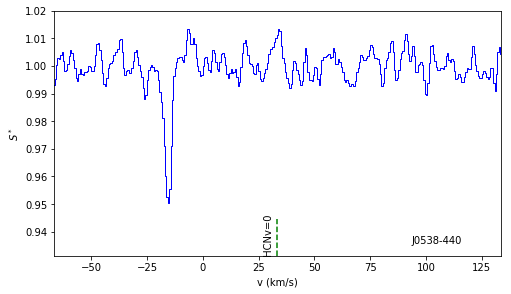

plots/J051002+180041 - H2Ov=0 -167.pdf


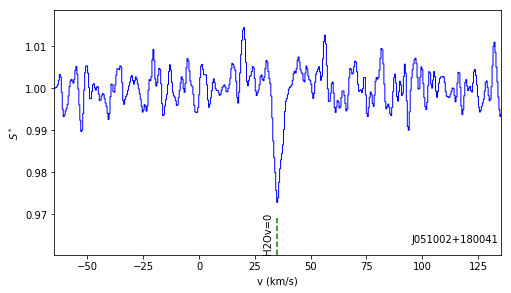

plots/J1159-2142 - HDO -8645.pdf


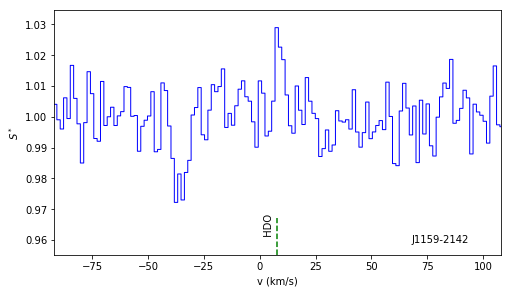

plots/J1159-2142 - HDO -8646.pdf


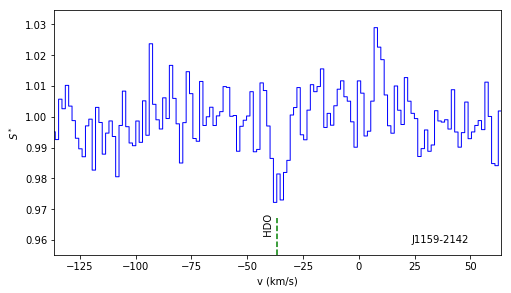

plots/J1337-1257 - HDO -8805.pdf


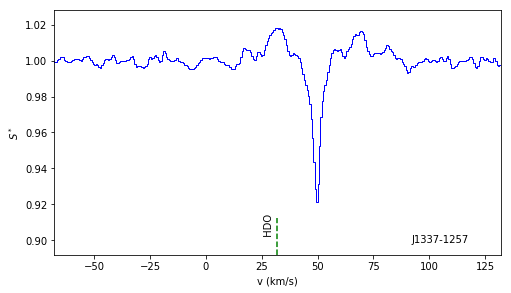

plots/J1337-1257 - HDO -8806.pdf


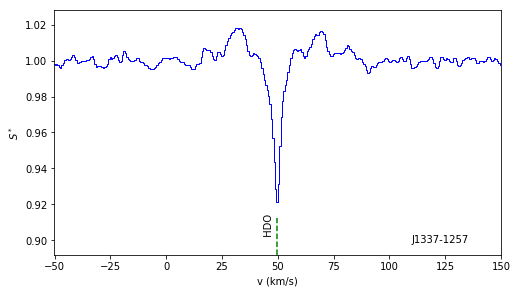

plots/J1337-1257 - HDO -8807.pdf


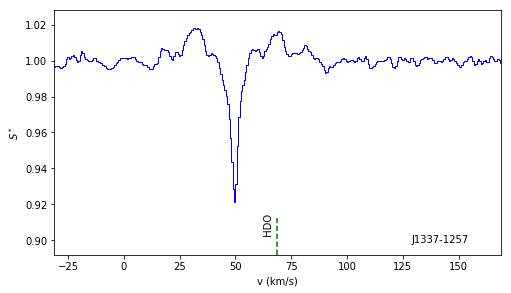

plots/J1832-2039 - HDO -8242.pdf


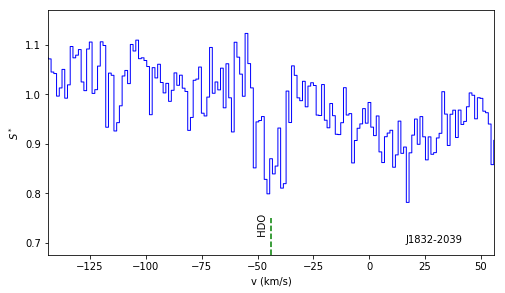

plots/J1832-2039 - HDO -8283.pdf


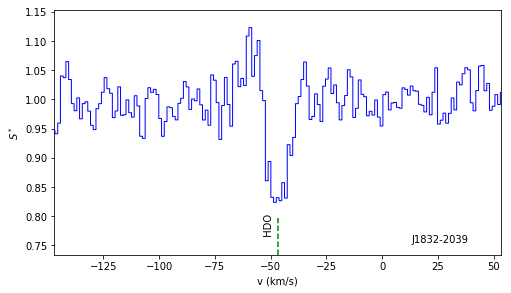

plots/J1832-2039 - HDO -8284.pdf


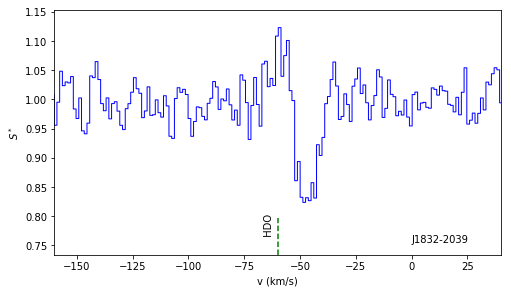

plots/J1833-2103 - C17O -7682.pdf


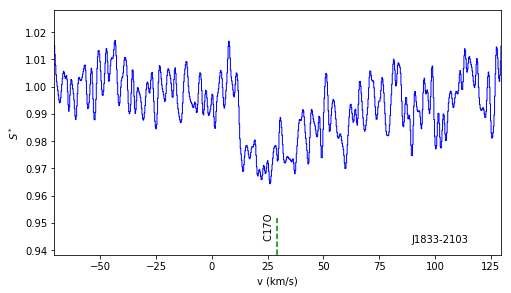

plots/J1833-2103 - C17O -7743.pdf


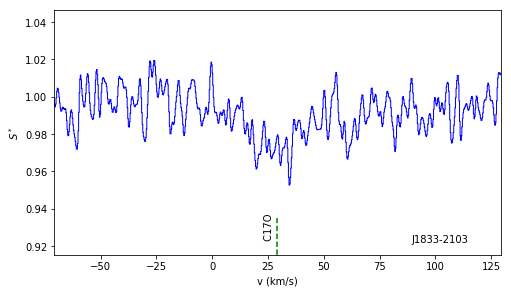

plots/J1833-2103 - SiOv=0 -7922.pdf


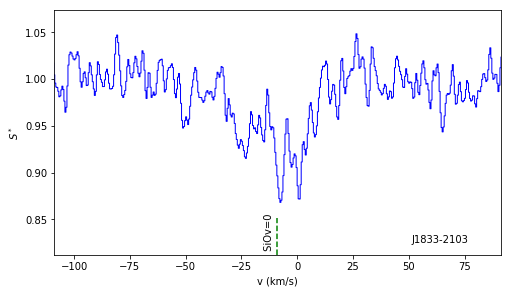

plots/J1833-2103 - SiOv=0 -7995.pdf


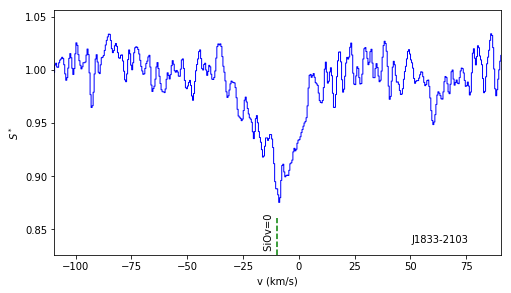

plots/J1924-292 - HDO -8451.pdf


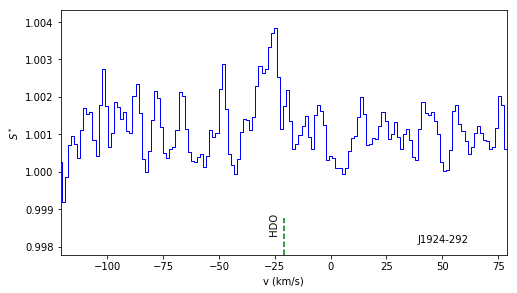

plots/J2148+0657 - NH3v=0 -6680.pdf


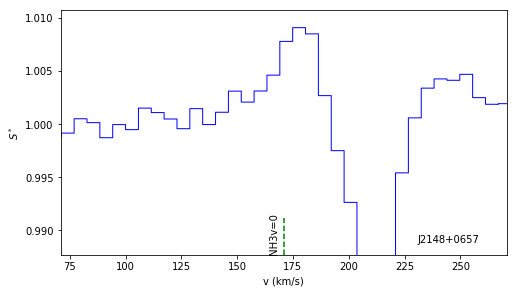

plots/J2148+0657 - SiOv=0 -7206.pdf


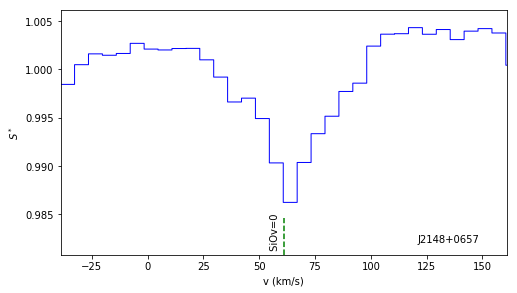

plots/J2148+0657 - SiOv=0 -7206.pdf


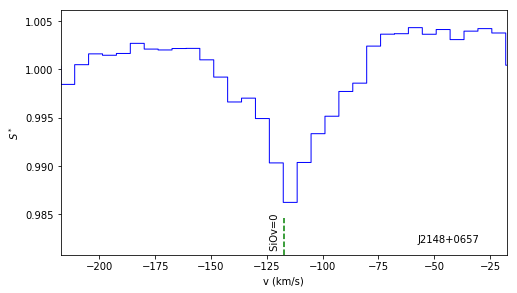

plots/J2148+0657 - HCO+v=0 -7206.pdf


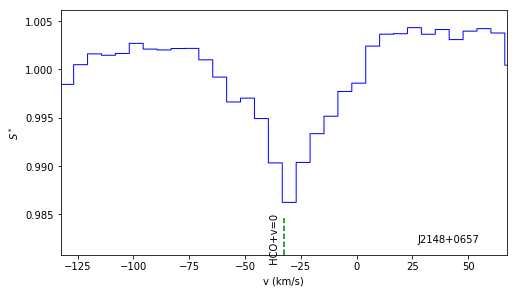

plots/J2148+0657 - HDO -7206.pdf


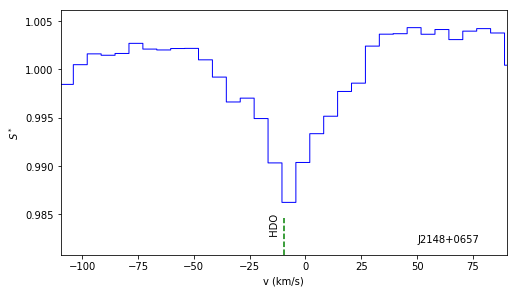

plots/J2148+0657 - NH3v=0 -6680.pdf


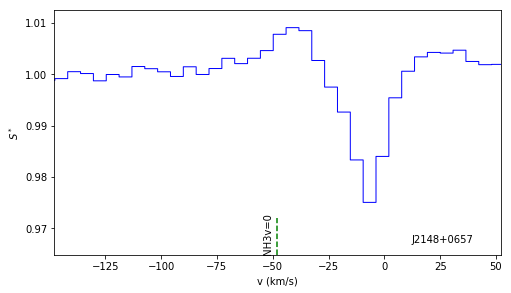

plots/J2148+0657 - C18O -4869.pdf


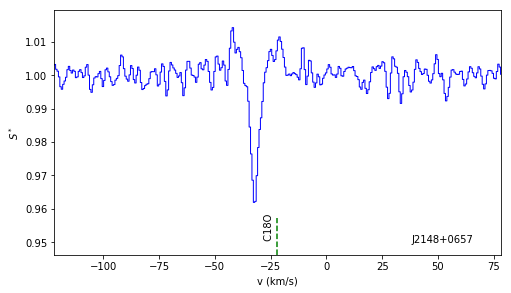

plots/J2148+0657 - H2Ov=0 -4869.pdf


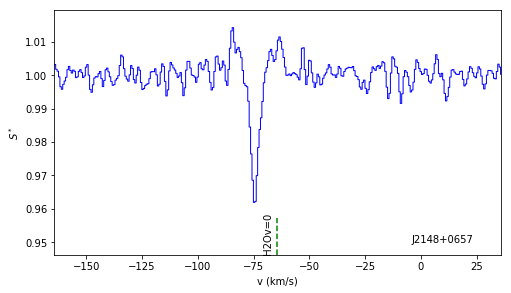

In [141]:
## plot the selected lines (publishable form)

lines = pd.read_csv("lineSelectedEG.csv", sep="|")

for i in range(len(lines)):
    txtinfo = {}
    cmdsql = "select filedata FROM dataset WHERE dataid = '%s'"%(lines.loc[i,'dataid'])
    resdb = al.query(cmdsql)
    datafile = resdb[0][0]

    datafile = datadir + datafile
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    freq = freq * (1. + lines.loc[i,'redshift'])
    dv = c.value * 1e-3 *  (freq - lines.loc[i,"Frequency"]) / lines.loc[i,'Frequency']
    
    txtinfo['source'] = lines.loc[i,'Source']
    txtinfo['species'] = lines.loc[i,'Species']
    txtinfo['frequency'] = lines.loc[i,'Frequency']
    txtinfo['velline'] = lines.loc[i,'Vel']
    txtinfo['lineid'] = lines.loc[i,'lineid']
    
    ## smoothing to 1 km/s
    # Create kernel
    ddv = abs(dv[1]-dv[0])
    kdv = 0.5 / ddv  ## 1km/s
    g = Gaussian1DKernel(stddev=kdv)
    z = convolve(amp, g)  
    
    
    plotSpectraPublication(dv, z , txtinfo)
    

### Sources without known redshift

In [142]:
al = lt.analysisLines(dbline)
res = al.getInfoDB(verbose = False)

sourcewithoutz =[]
for s  in res:
    redshiftFound = False
    if not isinstance(s[1], int):
        for z in s[1]:
                if not np.isnan(z):
                    redshiftFound = True
    else:
        redshiftFound = True 
        
    if not redshiftFound:
        sourcewithoutz.append(s[0])
        
print("## Sources with no redshift known:")
print(sourcewithoutz)

## lines of these sources.
for s  in sourcewithoutz:
        lines = al.findLinesSource(s)
        print("## Source: %s"%(s))
        print("### Lines: %d"%(len(lines)))
                        

## Sources: 133
##
## Sources with no redshift known:
[u'J0427-0700', u'J0440+2728', u'J0509+1806', u'J0517-0520', u'J0532-0307', u'J0541-0211', u'J0604+2429', u'J1159-0940', u'J1215-1731', u'J1420-0642', u'J1449-0045', u'J1744-3116', u'J2214+0711']
## Source: J0427-0700
### Lines: 4
## Source: J0440+2728
### Lines: 0
## Source: J0509+1806
### Lines: 35
## Source: J0517-0520
### Lines: 26
## Source: J0532-0307
### Lines: 1
## Source: J0541-0211
### Lines: 3
## Source: J0604+2429
### Lines: 0
## Source: J1159-0940
### Lines: 0
## Source: J1215-1731
### Lines: 15
## Source: J1420-0642
### Lines: 0
## Source: J1449-0045
### Lines: 0
## Source: J1744-3116
### Lines: 13
## Source: J2214+0711
### Lines: 0


### plot the spectra of sources with no z

In [143]:
snrmin = 4.0
linesFound = []
sumtable = ""
for s in sourcewithoutz :
    lines = al.findLinesSource(s)
    
    if len(lines) > 0:
        print("## Source: %s"%(s))
        for l in lines:
            if l[2] >= snrmin:
                z = 0.0
                nameTrans =  "unknown"
                frest = l[4] * (1. + z)
                freqLine = frest
                resDict = {}
 
                vel = c.value * 1e-3 *  (float(frest) - freqLine) / freqLine
                sumtable +="| %s | %2.4f | %s | %3.3f | %3.3f | %3.2f | %2.1f |  %d   | %d |  | \n"%(s, z, nameTrans, freqLine, vel, 1000.*l[3], l[2] , l[1], l[0])
                            
                resDict['species'] = nameTrans
                resDict['source'] = s
                resDict['frequency'] = freqLine
                resDict['freqsky'] = l[4]
                resDict['redshift'] = float(z)
                resDict['freqatrest'] = float(frest)
                resDict['peak'] = l[3]
                resDict['snr'] = l[2]
                resDict['dataid'] = l[1]
                resDict['lineid'] = l[0]
                ## query the datafile
                cmdsql = "select filedata FROM dataset WHERE dataid = '%d'"%(l[1])
                resdb = al.query(cmdsql)
                resDict['filedata'] = resdb[0][0]
                linesFound.append(resDict)

#print(sumtable)

## Source: J0427-0700
## Source: J0509+1806
## Source: J0517-0520
## Source: J0532-0307
## Source: J0541-0211
## Source: J1215-1731
## Source: J1744-3116


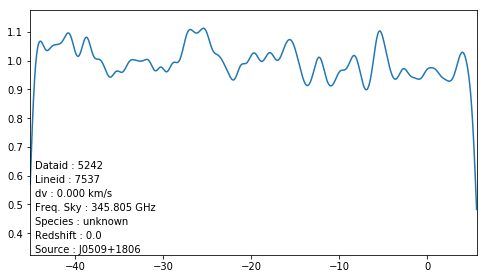

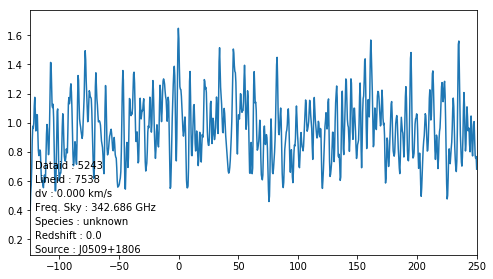

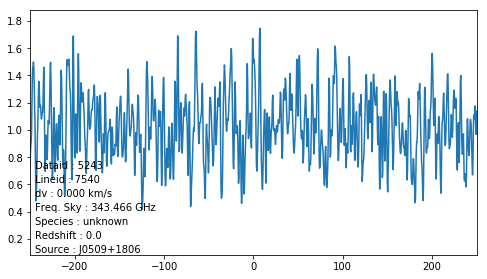

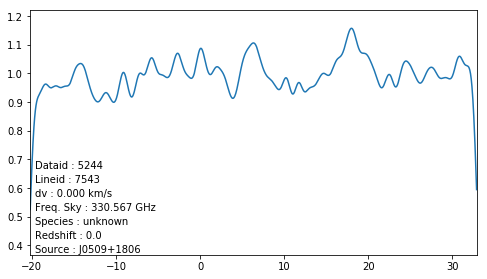

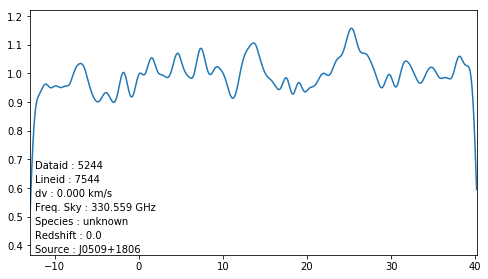

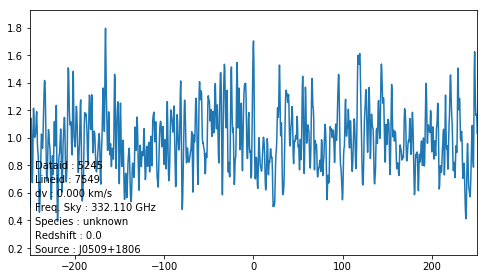

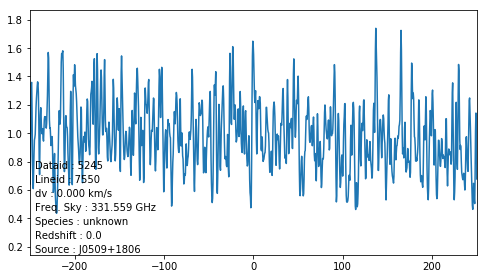

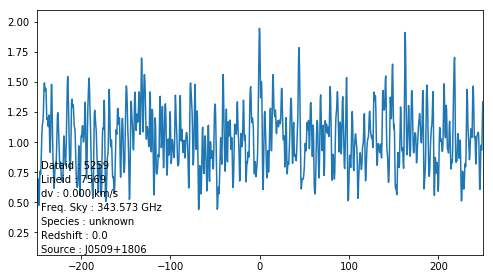

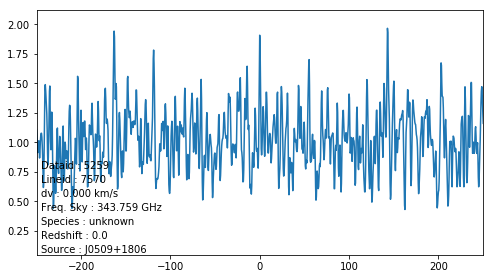

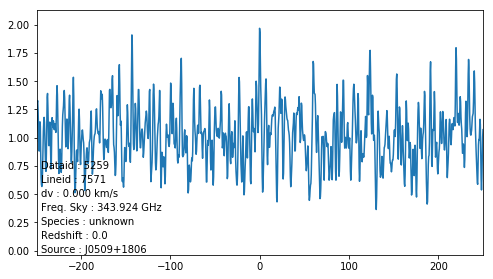

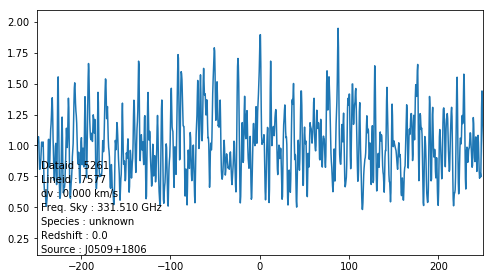

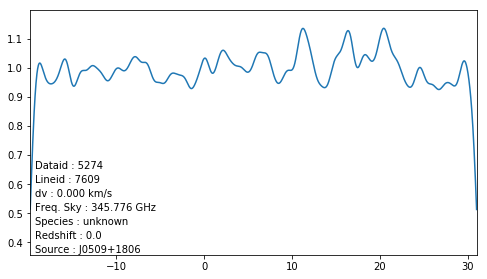

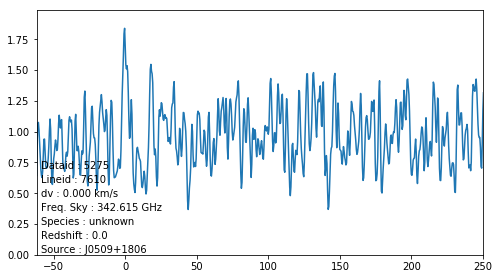

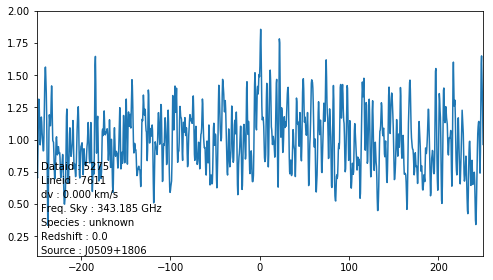

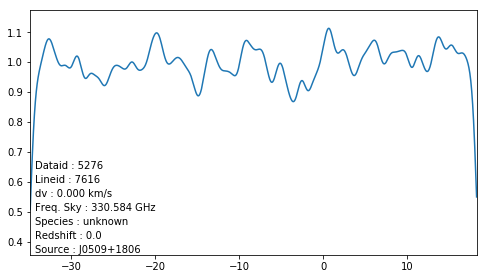

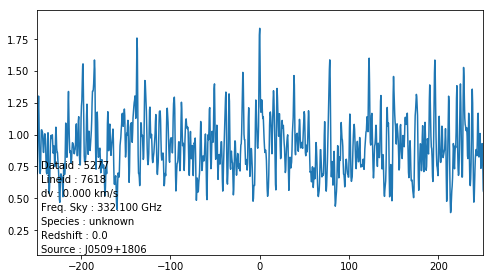

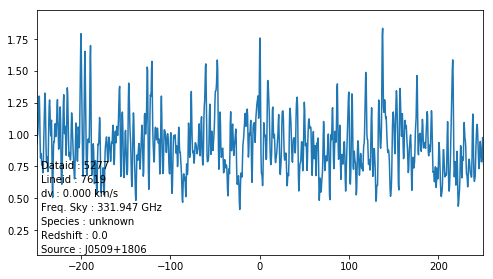

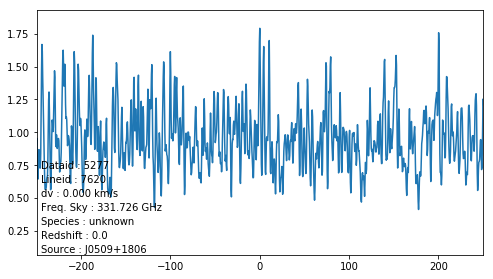

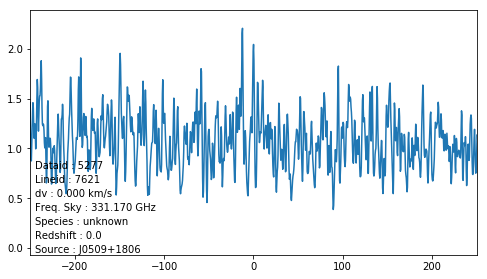

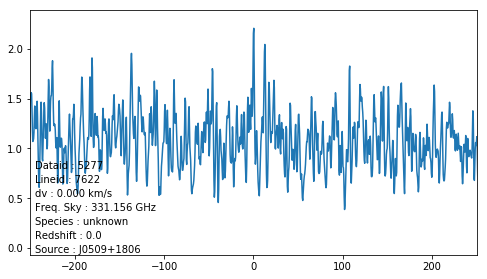

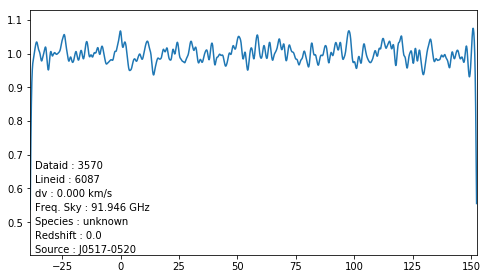

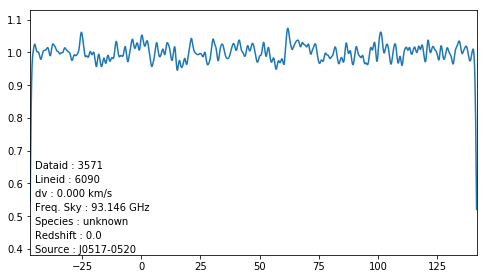

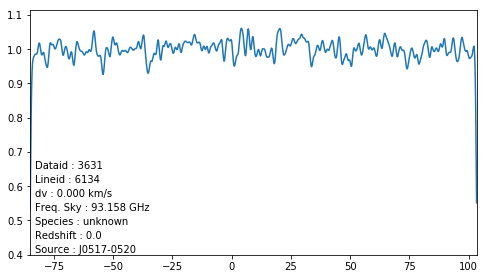

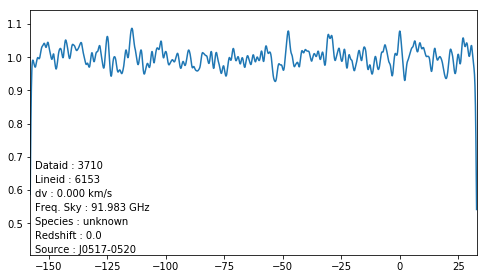

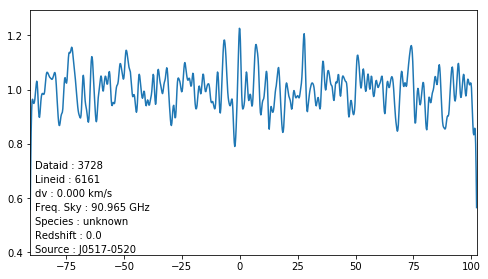

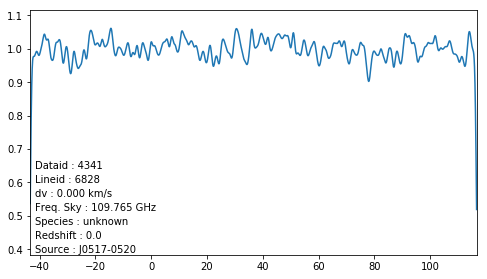

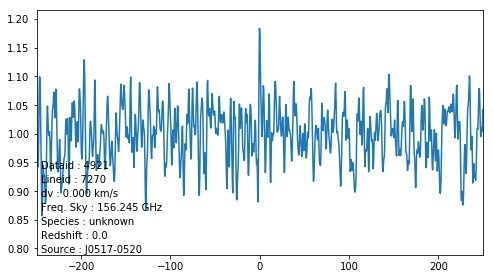

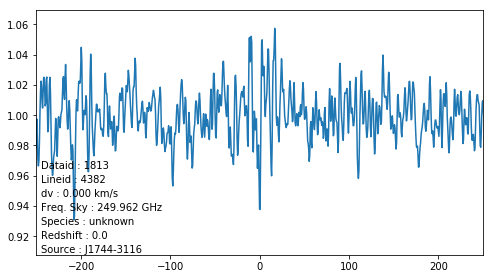

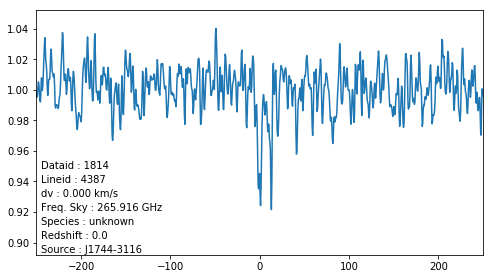

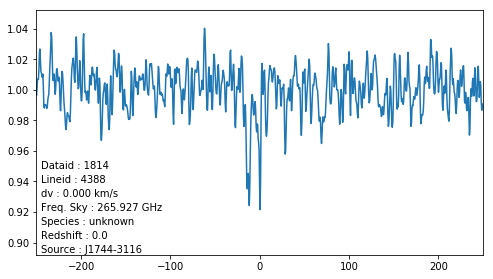

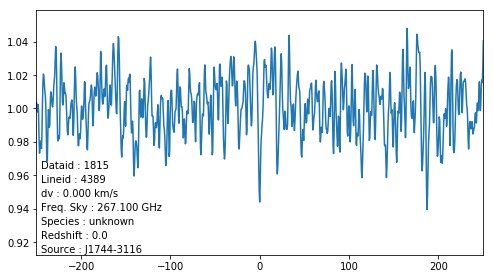

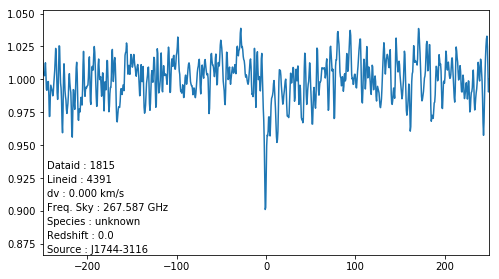

In [144]:
pl = lt.plotLines("fake", "fake", "fake")

for det in linesFound:
    datafile = datadir + det['filedata'][2:]
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    freq = freq * (1. + det['redshift'])
    dv = c.value * 1e-3 *  (freq - det['frequency']) / det['frequency']
    
    ## smoothing to 1 km/s
    # Create kernel
    ddv = abs(dv[1]-dv[0])
    kdv = 0.5 / ddv  ## 1km/s
    g = Gaussian1DKernel(stddev=kdv)
    z = convolve(amp, g)
    
    plotSpectra(det,dv,z , lineplot = False)